<a href="https://colab.research.google.com/github/carolinamunozce/elecciones/blob/main/RN_Elecciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sb
import matplotlib.pyplot as plt
from google.colab import drive

In [10]:
df = pd.read_csv('Data_Entrenamiento2.csv', sep=';', encoding = 'latin1')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 35, saw 2


In [7]:
# @title
df.head(3)

,Encuesta,Días,Observacion,Elección,Porcentaje,Resultado
0,AtlasIntel,2,Segunda Vuelta,Boric,51.0,55.87
1,AtlasIntel,2,Segunda Vuelta,J.A. Kast,49.0,43.13
2,Cadem,4,Segunda Vuelta,Boric,55.0,55.87


In [ ]:
dummies = pd.get_dummies(df, columns=['Encuesta', 'Observacion', 'Elección'], dtype = int, dummy_na=False)
dummies
datos = df.merge(dummies)

In [ ]:
datos.head(3)

,Encuesta,Días,Observacion,Elección,Porcentaje,Resultado,Encuesta_Activa,Encuesta_AtlasIntel,Encuesta_Black & White,Encuesta_CEP,...,Elección_Ind/Otro,Elección_J.A. Kast,Elección_Jadue,Elección_Lavín,Elección_ME-O,Elección_NS/NR,Elección_No votaría,Elección_Parisi,Elección_Provoste,Elección_Sichel
0,AtlasIntel,2,Segunda Vuelta,Boric,51.0,55.87,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AtlasIntel,2,Segunda Vuelta,J.A. Kast,49.0,43.13,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Cadem,4,Segunda Vuelta,Boric,55.0,55.87,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
datos = datos.drop(['Encuesta','Observacion','Elección'], axis = 1)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Días                          675 non-null    int64  
 1   Porcentaje                    675 non-null    float64
 2   Resultado                     675 non-null    float64
 3   Encuesta_Activa               675 non-null    int64  
 4   Encuesta_AtlasIntel           675 non-null    int64  
 5   Encuesta_Black & White        675 non-null    int64  
 6   Encuesta_CEP                  675 non-null    int64  
 7   Encuesta_Cadem                675 non-null    int64  
 8   Encuesta_Criteria             675 non-null    int64  
 9   Encuesta_Data Influye         675 non-null    int64  
 10  Encuesta_Feedback             675 non-null    int64  
 11  Encuesta_La Cosa Nostra       675 non-null    int64  
 12  Encuesta_Studio Publico       675 non-null    int64  
 13  Encue

In [ ]:
datos.head(3)

,Días,Porcentaje,Resultado,Encuesta_Activa,Encuesta_AtlasIntel,Encuesta_Black & White,Encuesta_CEP,Encuesta_Cadem,Encuesta_Criteria,Encuesta_Data Influye,...,Elección_Ind/Otro,Elección_J.A. Kast,Elección_Jadue,Elección_Lavín,Elección_ME-O,Elección_NS/NR,Elección_No votaría,Elección_Parisi,Elección_Provoste,Elección_Sichel
0,2,51.0,55.87,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,49.0,43.13,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,4,55.0,55.87,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = datos.drop(['Resultado'], axis = 1)
y = abs(datos['Resultado'])


In [ ]:
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size= .2)


modelo = tf.keras.Sequential([
tf.keras.layers.Dense(units = 64, activation = 'relu', input_shape = [X.shape[1]]),
tf.keras.layers.Dense(units = 32, activation = 'relu'),
tf.keras.layers.Dense(1)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=.1),
    loss  = 'mean_squared_error',
    metrics = ['mae']
)

In [ ]:
print('Entrenar el modelo')
historial = modelo.fit(X_pru, y_pru, epochs = 300, verbose = False)
print('Modelo entrenado')

Entrenar el modelo
Modelo entrenado


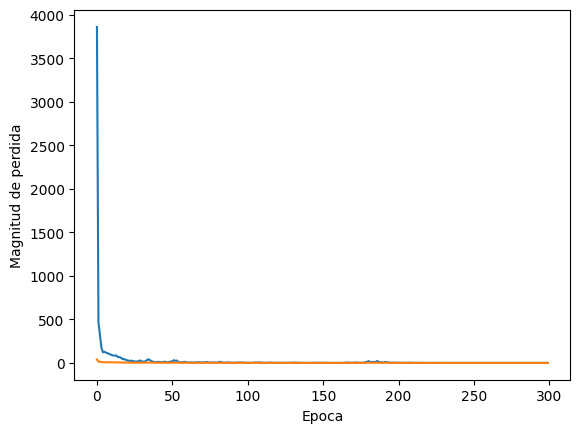

In [ ]:
plt.xlabel('Epoca')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])
plt.plot(historial.history['mae'])

In [ ]:
loss , mae = modelo.evaluate(X_pru, y_pru, verbose = 0)
print(f'Mae en test:{mae:.2f}')
print(f'Loss en test:{loss:.2f}')

Mae en test:0.40
Loss en test:0.24


In [ ]:
# @title
error_predicho = modelo.predict(X_pru)
error_predicho
#error_predicho = error_predicho.flatten()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


array([[11.383641 ],
       [ 9.77793  ],
       [25.465677 ],
       [ 9.672839 ],
       [ 0.4906338],
       [12.5337   ],
       [11.514778 ],
       [12.724055 ],
       [27.72755  ],
       [12.703779 ],
       [ 0.4906338],
       [12.690115 ],
       [12.564764 ],
       [48.860596 ],
       [25.549461 ],
       [ 0.4906338],
       [ 0.4906338],
       [ 0.4906338],
       [ 0.4906338],
       [ 7.366117 ],
       [ 0.4906338],
       [55.039894 ],
       [12.696573 ],
       [12.74527  ],
       [42.71059  ],
       [ 0.4906338],
       [ 0.4906338],
       [ 0.4906338],
       [ 0.4906338],
       [ 0.4906338],
       [ 0.4906338],
       [12.574133 ],
       [12.664559 ],
       [27.719309 ],
       [ 0.4906338],
       [ 0.4906338],
       [55.327873 ],
       [30.57541  ],
       [27.736826 ],
       [ 7.366117 ],
       [12.729537 ],
       [12.705415 ],
       [25.260532 ],
       [ 7.561328 ],
       [11.430933 ],
       [ 0.4906338],
       [ 0.4906338],
       [12.56

In [ ]:
# @title
pesos = 1/(error_predicho.flatten() + 1e-6)
pesos = pesos/pesos.sum()

In [ ]:
# @title
Porcentajes_test = datos.loc[X_test.index, 'Porcentaje']
resultado_final = (pesos * Porcentajes_test).sum()
print(f'Resultado final: {resultado_final:.2f}')

NameError: name 'X_test' is not defined

In [ ]:
# @title
X_test_with_info = X_test.copy()
X_test_with_info['peso'] = pesos

encuestadoras = [col for col in datos.columns if col.startswith('Encuesta_')]

X_test_with_info['Encuestadora'] = X_test_with_info[encuestadoras].idxmax(axis=1)

peso_encuestadora = X_test_with_info.groupby('Encuestadora')['peso'].mean()

print(peso_encuestadora)